In [ ]:
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [ ]:
# Load the data from the Excel file
file_path = 'Bullying_2018_clean.xlsx'
data = pd.read_excel(file_path)

In [ ]:
# Use LabelEncoder for categorical columns and add them to the original dataframe
encoded_data = data.copy()
label_encoder = LabelEncoder()
encoded_data['Gender_encoded'] = label_encoder.fit_transform(data['Sex'])
encoded_data['Custom_Age_encoded'] = label_encoder.fit_transform(data['Custom_Age'])
encoded_data['Attacked_encoded'] = label_encoder.fit_transform(data['Physically_attacked'])
encoded_data['Most_of_the_time_or_always_felt_lonely'] = label_encoder.fit_transform(data['Most_of_the_time_or_always_felt_lonely'])
encoded_data['Bullied_on_school_property_in_past_12_months_encoded'] = label_encoder.fit_transform(data['Bullied_on_school_property_in_past_12_months'])
selected_columns = ['record','Gender_encoded', 'Custom_Age_encoded', 'Attacked_encoded', 'Most_of_the_time_or_always_felt_lonely', 'Bullied_on_school_property_in_past_12_months_encoded']
encoded_data = encoded_data[selected_columns]
record = encoded_data.copy()
encoded_data.drop('record',axis=1,inplace=True)
# Display the updated dataframe
print(encoded_data.head())

   Gender_encoded  Custom_Age_encoded  Attacked_encoded  \
0               0                   2                 0   
1               1                   3                 0   
2               1                   5                 0   
3               0                   2                 0   
4               1                   2                 0   

   Most_of_the_time_or_always_felt_lonely  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Bullied_on_school_property_in_past_12_months_encoded  
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     


In [ ]:
from sklearn.preprocessing import normalize
data = pd.DataFrame( normalize(encoded_data), columns=encoded_data.columns)
data.head()

,Gender_encoded,Custom_Age_encoded,Attacked_encoded,Most_of_the_time_or_always_felt_lonely,Bullied_on_school_property_in_past_12_months_encoded
0,0.000000,1.000000,0.0,0.0,0.0
1,0.316228,0.948683,0.0,0.0,0.0
2,0.196116,0.980581,0.0,0.0,0.0
3,0.000000,1.000000,0.0,0.0,0.0
4,0.447214,0.894427,0.0,0.0,0.0


Text(0.5, 0, 'Number Of Component')

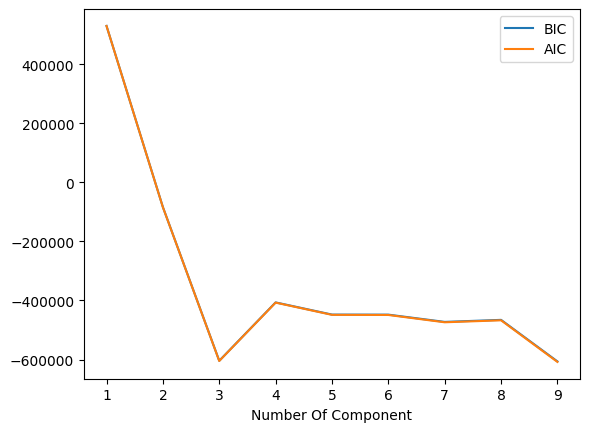

In [ ]:
#Prepare
n_conponent = np.arange(1,10)

#Create GGM Model
models = [GaussianMixture(n_components = n,random_state=42).fit(encoded_data) for n in n_conponent]
#Plot
plt.plot(n_conponent,
         [m.bic(encoded_data) for m in models],
         label = 'BIC')
plt.plot(n_conponent,
         [m.aic(encoded_data) for m in models],
         label = 'AIC')
plt.legend()
plt.xlabel("Number Of Component")

In [ ]:
# create GM Models
model = GaussianMixture(n_components=2,
                        random_state=42).fit(encoded_data)
cluster = pd.Series(model.predict(encoded_data))
encoded_data['cluster'] = cluster
encoded_data

,Gender_encoded,Custom_Age_encoded,Attacked_encoded,Most_of_the_time_or_always_felt_lonely,Bullied_on_school_property_in_past_12_months_encoded,cluster
0,0,2,0,0,0,1
1,1,3,0,0,0,1
2,1,5,0,0,0,1
3,0,2,0,0,0,1
4,1,2,0,0,0,1
...,...,...,...,...,...,...
52725,1,5,0,0,0,1
52726,1,5,0,0,0,1
52727,1,5,0,0,0,1
52728,0,5,0,0,0,1


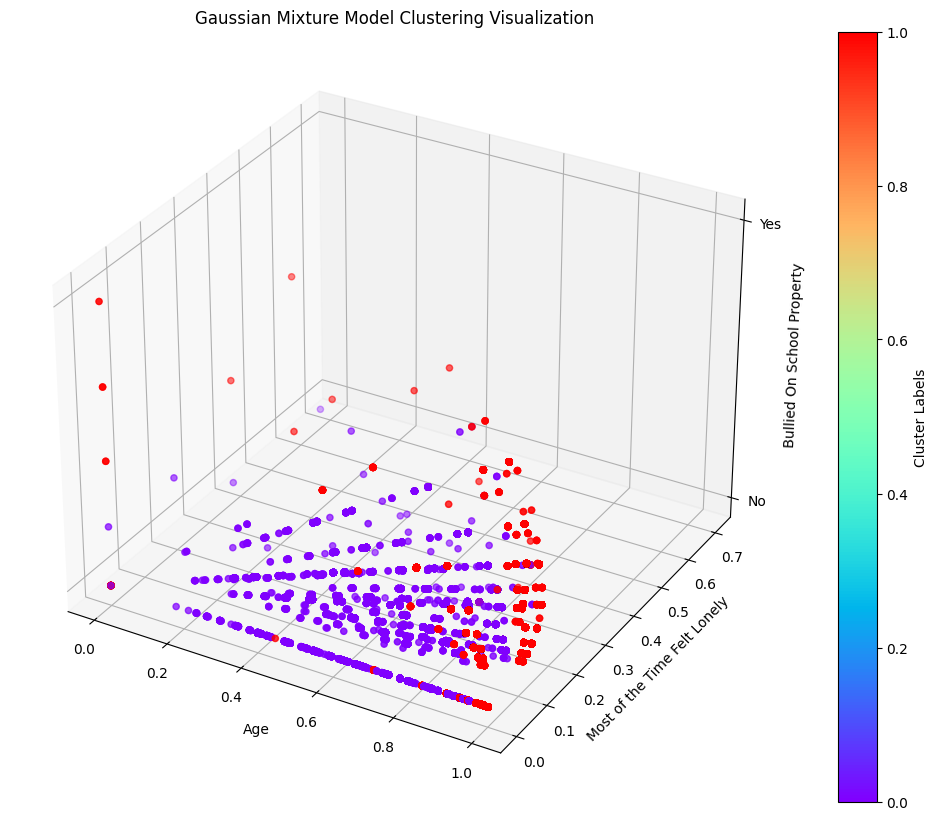

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# Assuming 'cluster' is the column containing GMM cluster labels
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    normalized_data[:, 1],
    normalized_data[:, 3],
    normalized_data[:, 4],
    c=cluster,  # GMM cluster labels
    cmap='rainbow'
)

ax.set_title('Gaussian Mixture Model Clustering Visualization')
ax.set_xlabel('Age')
ax.set_ylabel('Most of the Time Felt Lonely')
ax.set_zlabel('Bullied On School Property')

# Set custom Z-axis tick labels
ax.set_zticks([0, 1])
ax.set_zticklabels(['No', 'Yes'])

fig.colorbar(scatter, ax=ax, label='Cluster Labels')

plt.show()

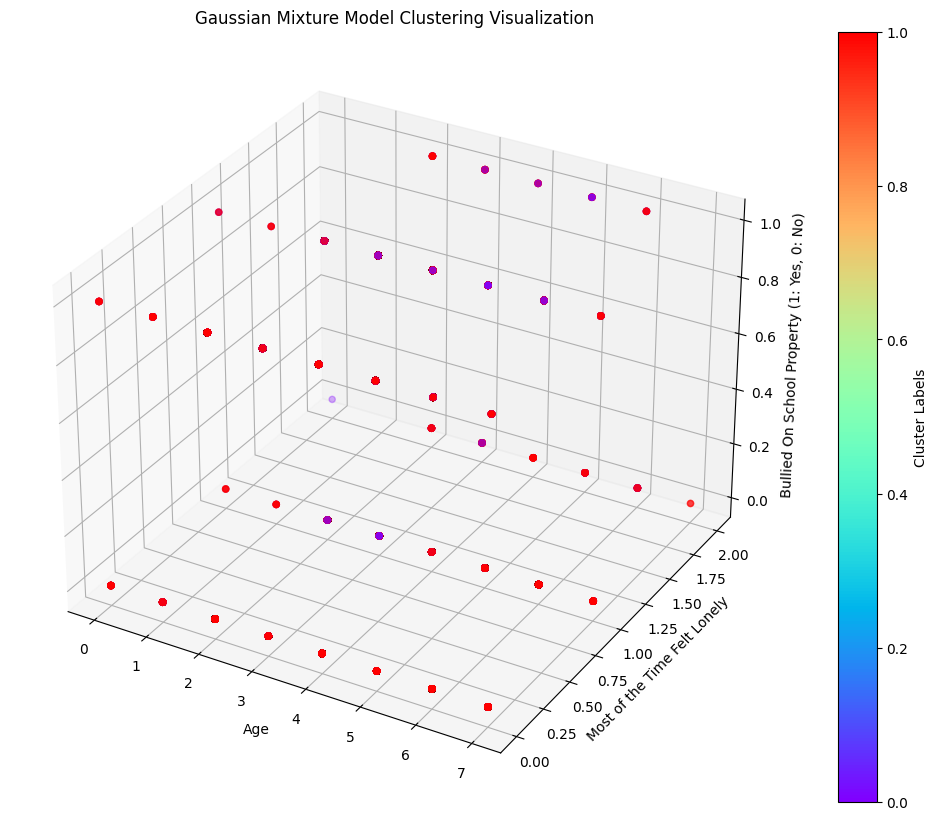

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Encode 'Bullied On School Property' column as binary again
label_encoder = LabelEncoder()
encoded_data['Bullied_on_school_property_in_past_12_months_encoded'] = label_encoder.fit_transform(encoded_data['Bullied_on_school_property_in_past_12_months_encoded'])

scatter = ax.scatter(
    encoded_data['Custom_Age_encoded'],
    encoded_data['Most_of_the_time_or_always_felt_lonely'],
    encoded_data['Bullied_on_school_property_in_past_12_months_encoded'],
    c=encoded_data['cluster'],  # GMM cluster labels
    cmap='rainbow'
)

ax.set_title('Gaussian Mixture Model Clustering Visualization')
ax.set_xlabel('Age')
ax.set_ylabel('Most of the Time Felt Lonely')
ax.set_zlabel('Bullied On School Property (1: Yes, 0: No)')
fig.colorbar(scatter, ax=ax, label='Cluster Labels')

plt.show()

In [ ]:
# Add 'record' column back to the DataFrame
encoded_data['record'] = record['record']

# Save the cluster results with 'record' to CSV file
encoded_data.to_csv('cluster_results_Gaussian.csv', index=False)

In [ ]:
from sklearn.metrics import silhouette_score
# Fit a Gaussian Mixture Model
n_components = 2
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(encoded_data)

# Predict the cluster labels
labels = gmm.predict(encoded_data)

# Silhouette score
silhouette_avg = silhouette_score(encoded_data, labels)
print(f"Silhouette Score: {silhouette_avg}")

columns = ['Gender_encoded','Custom_Age_encoded','Attacked_encoded','Most_of_the_time_or_always_felt_lonely','Bullied_on_school_property_in_past_12_months_encoded']

# Cluster centers
centers = gmm.means_

# Create a DataFrame with cluster centers and column names
centers_df = pd.DataFrame(centers, columns=columns)

# Print the DataFrame
print("Cluster Centers:")
print(centers_df)

Silhouette Score: 0.3729476643313537
Cluster Centers:
   Gender_encoded  Custom_Age_encoded  Attacked_encoded  \
0        0.541364            3.871383          2.514192   
1        0.475334            3.920510          0.000000   

   Most_of_the_time_or_always_felt_lonely  \
0                                0.302886   
1                                0.148713   

   Bullied_on_school_property_in_past_12_months_encoded  
0                                           0.368734     
1                                           0.179278     


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

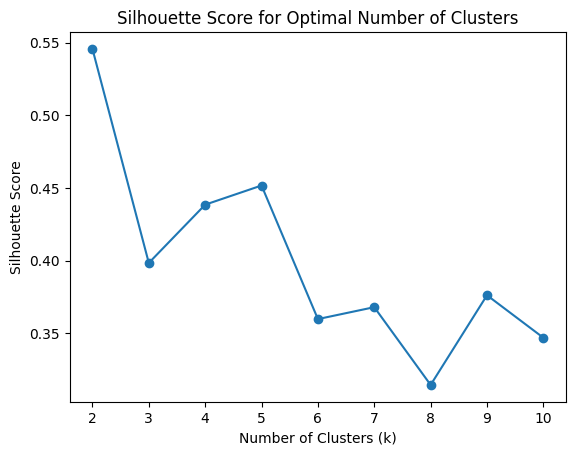

Optimal number of clusters: 2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

# Load the data from the Excel file
file_path = 'Bullying_2018_clean.xlsx'
data = pd.read_excel(file_path)

# Use LabelEncoder for categorical columns and add them to the original dataframe
encoded_data = data.copy()
label_encoder = LabelEncoder()
encoded_data['Gender_encoded'] = label_encoder.fit_transform(data['Sex'])
encoded_data['Custom_Age_encoded'] = label_encoder.fit_transform(data['Custom_Age'])
encoded_data['Attacked_encoded'] = label_encoder.fit_transform(data['Physically_attacked'])
encoded_data['Most_of_the_time_or_always_felt_lonely'] = label_encoder.fit_transform(data['Most_of_the_time_or_always_felt_lonely'])
encoded_data['Bullied_on_school_property_in_past_12_months_encoded'] = label_encoder.fit_transform(data['Bullied_on_school_property_in_past_12_months'])

selected_columns = ['record', 'Gender_encoded', 'Custom_Age_encoded', 'Attacked_encoded', 'Fighting_encoded', 'Bullied_on_school_property_in_past_12_months_encoded']
encoded_data = encoded_data[selected_columns]

# Drop 'record' for clustering
X = encoded_data.drop('record', axis=1)

# Choose a range of candidate cluster numbers
k_values = range(2, 11)

# Store silhouette scores for each k
silhouette_scores = []

# Iterate over each value of k
for k in k_values:
    # Apply k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)

    # Calculate Silhouette score
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters where Silhouette score is maximized
optimal_k = k_values[np.argmax(silhouette_scores)]

# Plot the Silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

print(f'Optimal number of clusters: {optimal_k}')

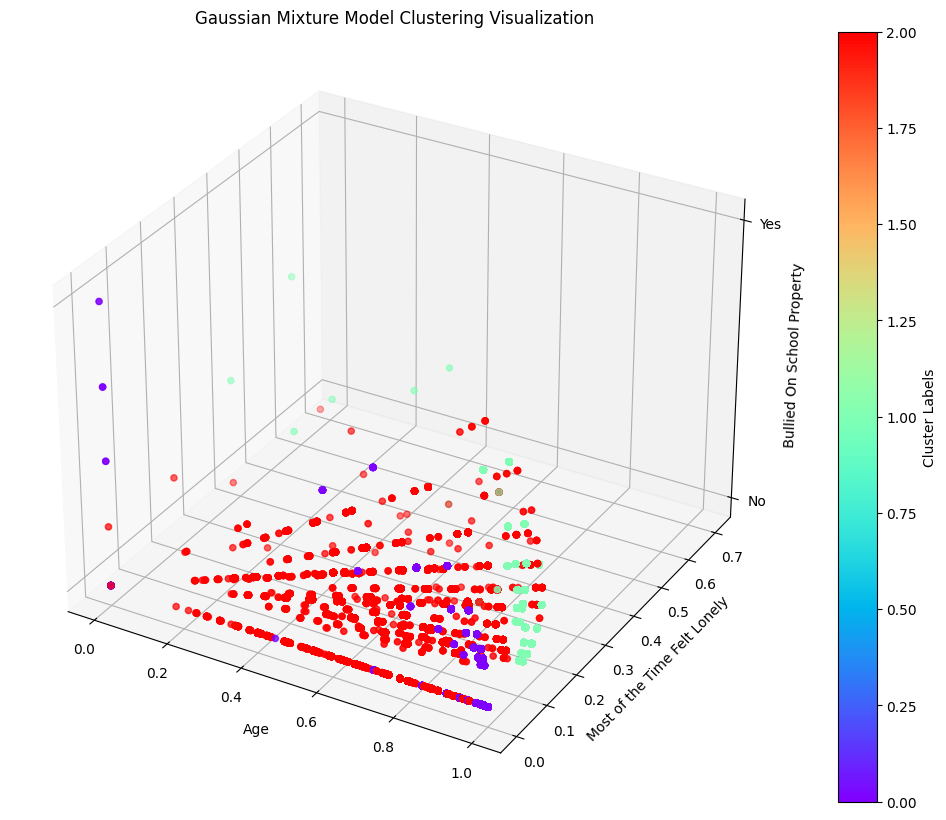

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# create GM Models
model = GaussianMixture(n_components=3,
                        random_state=42).fit(encoded_data)
cluster = pd.Series(model.predict(encoded_data))
encoded_data['cluster'] = cluster
encoded_data

# Assuming 'cluster' is the column containing GMM cluster labels
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    normalized_data[:, 1],
    normalized_data[:, 3],
    normalized_data[:, 4],
    c=cluster,  # GMM cluster labels
    cmap='rainbow'
)

ax.set_title('Gaussian Mixture Model Clustering Visualization')
ax.set_xlabel('Age')
ax.set_ylabel('Most of the Time Felt Lonely')
ax.set_zlabel('Bullied On School Property')

# Set custom Z-axis tick labels
ax.set_zticks([0, 1])
ax.set_zticklabels(['No', 'Yes'])

fig.colorbar(scatter, ax=ax, label='Cluster Labels')

plt.show()


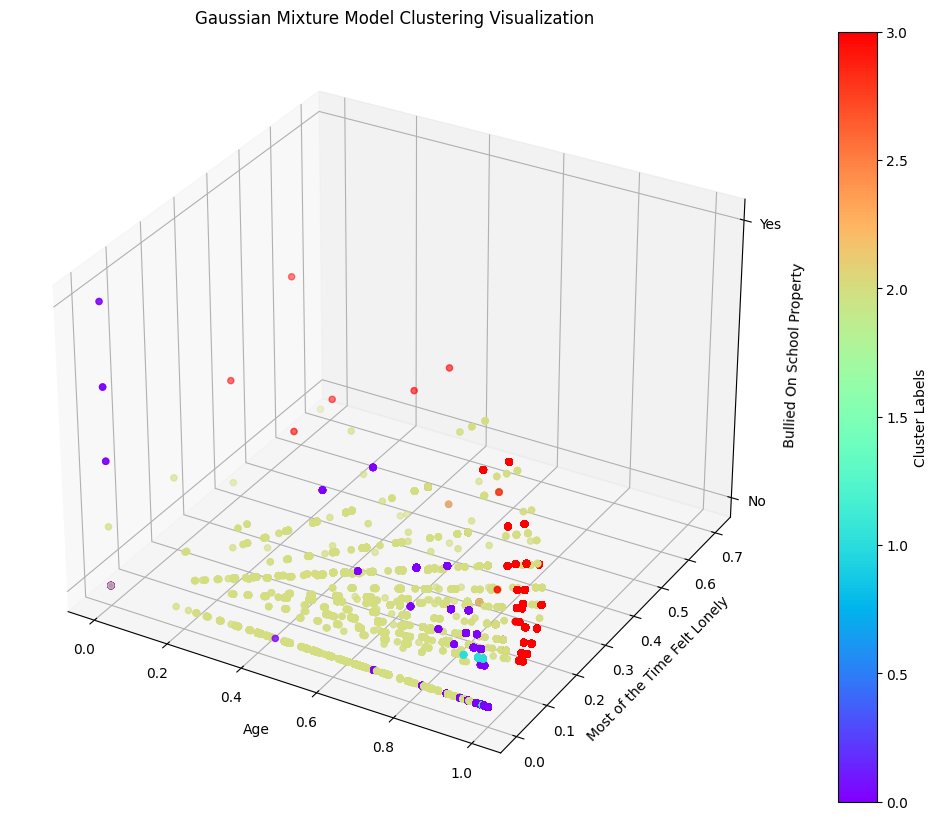

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# create GM Models
model = GaussianMixture(n_components=4,
                        random_state=42).fit(encoded_data)
cluster = pd.Series(model.predict(encoded_data))
encoded_data['cluster'] = cluster
encoded_data

# Assuming 'cluster' is the column containing GMM cluster labels
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    normalized_data[:, 1],
    normalized_data[:, 3],
    normalized_data[:, 4],
    c=cluster,  # GMM cluster labels
    cmap='rainbow'
)

ax.set_title('Gaussian Mixture Model Clustering Visualization')
ax.set_xlabel('Age')
ax.set_ylabel('Most of the Time Felt Lonely')
ax.set_zlabel('Bullied On School Property')

# Set custom Z-axis tick labels
ax.set_zticks([0, 1])
ax.set_zticklabels(['No', 'Yes'])

fig.colorbar(scatter, ax=ax, label='Cluster Labels')

plt.show()